In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import random
from datetime import datetime, timedelta

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# 1. Parámetros de la Simulación
N_REGISTROS = 1000
FECHA_INICIO = datetime(2023, 1, 1)
PRODUCTOS = {
    'Gaming': [('Consola Retro X', 450), ('Silla Gamer Pro', 250)],
    'Wearables': [('SmartWatch Neon', 150), ('Gafas AR Vision', 900)],
    'Drones': [('Dron Autonomo V2', 850), ('Mini Dron Spy', 120)],
    'Accesorios': [('Teclado Mecánico', 120), ('Mouse Ergonómico', 60)]
}
REGIONES = ['Norteamérica', 'Europa', 'Asia', 'Latam']
CANALES = ['Online', 'Tienda Física', 'Reseller']

data = []

# 2. Generación del bucle
for i in range(N_REGISTROS):
    # --- FECHA (Con tendencia estacional) ---
    # Distribución uniforme a lo largo del año
    dias_offset = np.random.randint(0, 365)
    fecha = FECHA_INICIO + timedelta(days=dias_offset)
    
    # Factor estacional: Ventas aumentan hacia fin de año (mes 11 y 12)
    mes = fecha.month
    factor_estacional = 1.0 + (0.5 if mes >= 11 else 0.0)

    # --- PRODUCTO Y CATEGORÍA ---
    cat = random.choice(list(PRODUCTOS.keys()))
    prod_info = random.choice(PRODUCTOS[cat])
    producto, precio_base = prod_info
    
    # --- PRECIO Y CANTIDAD (Lógica de negocio simulada) ---
    # Introducimos un poco de ruido en el precio
    precio_final = round(np.random.normal(precio_base, precio_base * 0.05), 2)
    
    # Descuento aleatorio (0%, 10%, 20% o 30%)
    descuento = np.random.choice([0.0, 0.1, 0.2, 0.3], p=[0.5, 0.3, 0.15, 0.05])
    
    # La cantidad depende del precio y el descuento (Elasticidad precio)
    # Productos baratos se venden más; descuentos aumentan volumen
    cantidad_base = int((1000 / precio_base) * 5) 
    cantidad = int(np.random.poisson(cantidad_base) * (1 + descuento * 2) * factor_estacional)
    
    # Evitar cantidades cero
    cantidad = max(1, cantidad)

    # --- ANOMALÍA (Evento Viral) ---
    # Simulamos que el "Dron Autonomo V2" se hizo viral en "Asia" en Agosto
    if producto == 'Dron Autonomo V2' and region == 'Asia' and mes == 8:
        cantidad = cantidad * 5  # Spike masivo

    # --- SATISFACCIÓN Y REGIÓN ---
    region = np.random.choice(REGIONES, p=[0.4, 0.3, 0.2, 0.1])
    canal = np.random.choice(CANALES)
    
    # La satisfacción correlaciona con el descuento y baja si el precio es muy alto
    sat_base = 4.0
    sat_ajuste = (descuento * 2) - (precio_final / 5000) + np.random.normal(0, 0.5)
    satisfaccion = round(min(5.0, max(1.0, sat_base + sat_ajuste)), 1)

    # --- Construcción del Registro ---
    transaccion = {
        "id": f"TRX-{1000+i}",
        "fecha": fecha.strftime("%Y-%m-%d"),
        "mes": mes,
        "categoria": cat,
        "producto": producto,
        "region": region,
        "canal": canal,
        "precio_unitario": precio_final,
        "cantidad": cantidad,
        "descuento": descuento,
        "total_venta": round(precio_final * cantidad * (1 - descuento), 2),
        "satisfaccion": satisfaccion,
        "es_vip": bool(random.getrandbits(1))
    }
    data.append(transaccion)

df=pd.DataFrame(data)

In [3]:
df

,id,fecha,mes,categoria,producto,region,canal,precio_unitario,cantidad,descuento,total_venta,satisfaccion,es_vip
0,TRX-1000,2023-04-13,4,Gaming,Silla Gamer Pro,Norteamérica,Reseller,243.12,25,0.1,5470.20,4.4,True
1,TRX-1001,2023-03-29,3,Drones,Dron Autonomo V2,Latam,Online,812.38,3,0.1,2193.43,3.8,False
2,TRX-1002,2023-11-10,11,Gaming,Consola Retro X,Norteamérica,Reseller,391.22,18,0.0,7041.96,4.4,True
3,TRX-1003,2023-07-09,7,Accesorios,Mouse Ergonómico,Europa,Tienda Física,60.67,94,0.0,5702.98,3.6,False
4,TRX-1004,2023-03-30,3,Wearables,SmartWatch Neon,Europa,Reseller,145.50,38,0.1,4976.10,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRX-1995,2023-11-30,11,Gaming,Silla Gamer Pro,Norteamérica,Online,238.40,30,0.0,7152.00,4.6,True
996,TRX-1996,2023-02-07,2,Accesorios,Mouse Ergonómico,Europa,Tienda Física,61.31,130,0.2,6376.24,4.6,False
997,TRX-1997,2023-09-12,9,Gaming,Consola Retro X,Latam,Online,451.48,13,0.1,5282.32,3.3,False
998,TRX-1998,2023-03-10,3,Gaming,Silla Gamer Pro,Europa,Reseller,253.02,18,0.2,3643.49,4.5,False


In [12]:
df_fecha=df[["id","mes"]].groupby("mes").count().reset_index()
df_fecha

,mes,id
0,1,97
1,2,70
2,3,76
3,4,73
4,5,106
5,6,89
6,7,79
7,8,89
8,9,78
9,10,74


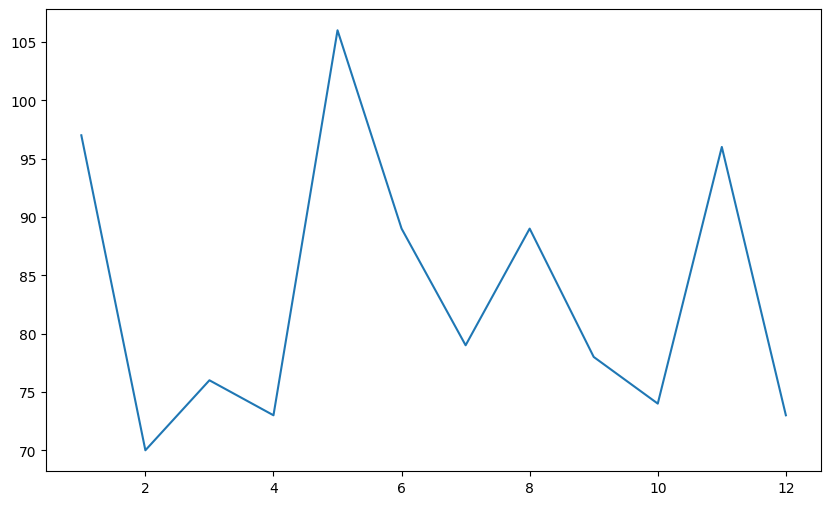

In [13]:
### Definimos lienzo y gráfico
### Forma pasiva (operador)
fig, ax= plt.subplots(figsize=(10,6))
df_fecha=df[["id","mes"]].groupby("mes").count().reset_index()
plt.plot(df_fecha['mes'],df_fecha["id"])
plt.show()

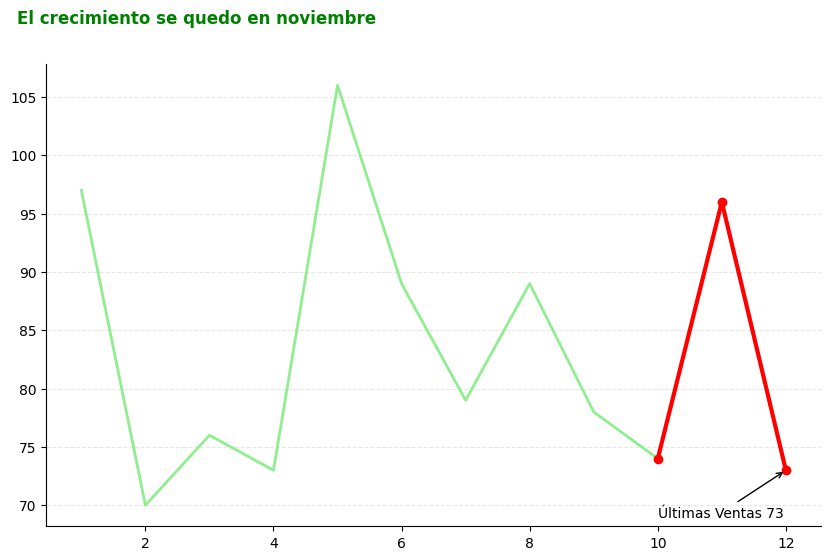

In [26]:
### Definimos lienzo y gráfico
### Forma activa (director)
fig, ax= plt.subplots(figsize=(10,6))

ax.plot(df_fecha['mes'],df_fecha["id"], 
        color = "lightgreen",
        linewidth=2,
        label="Ventas Mensuales"
       )
df_q4=df_fecha.tail(3)
ax.plot(df_q4['mes'],df_q4["id"], 
        color = "red",
        linewidth=3,
        marker="o"
       )
ax.text(x=0,y=df_fecha["id"].max()*1.05, 
        s="El crecimiento se quedo en noviembre",
        fontsize = 12,
        fontweight="bold",
        color = "green")
ultimo=df_fecha["id"].iloc[-1]
ax.annotate(f"Últimas Ventas {ultimo}",
           xy=(12,ultimo),
            xytext=(10,ultimo-4),
            arrowprops = dict(facecolor="black", arrowstyle= "->"),
            fontsize=10      
           )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis="y",linestyle="--"
, alpha=0.3)

plt.show()

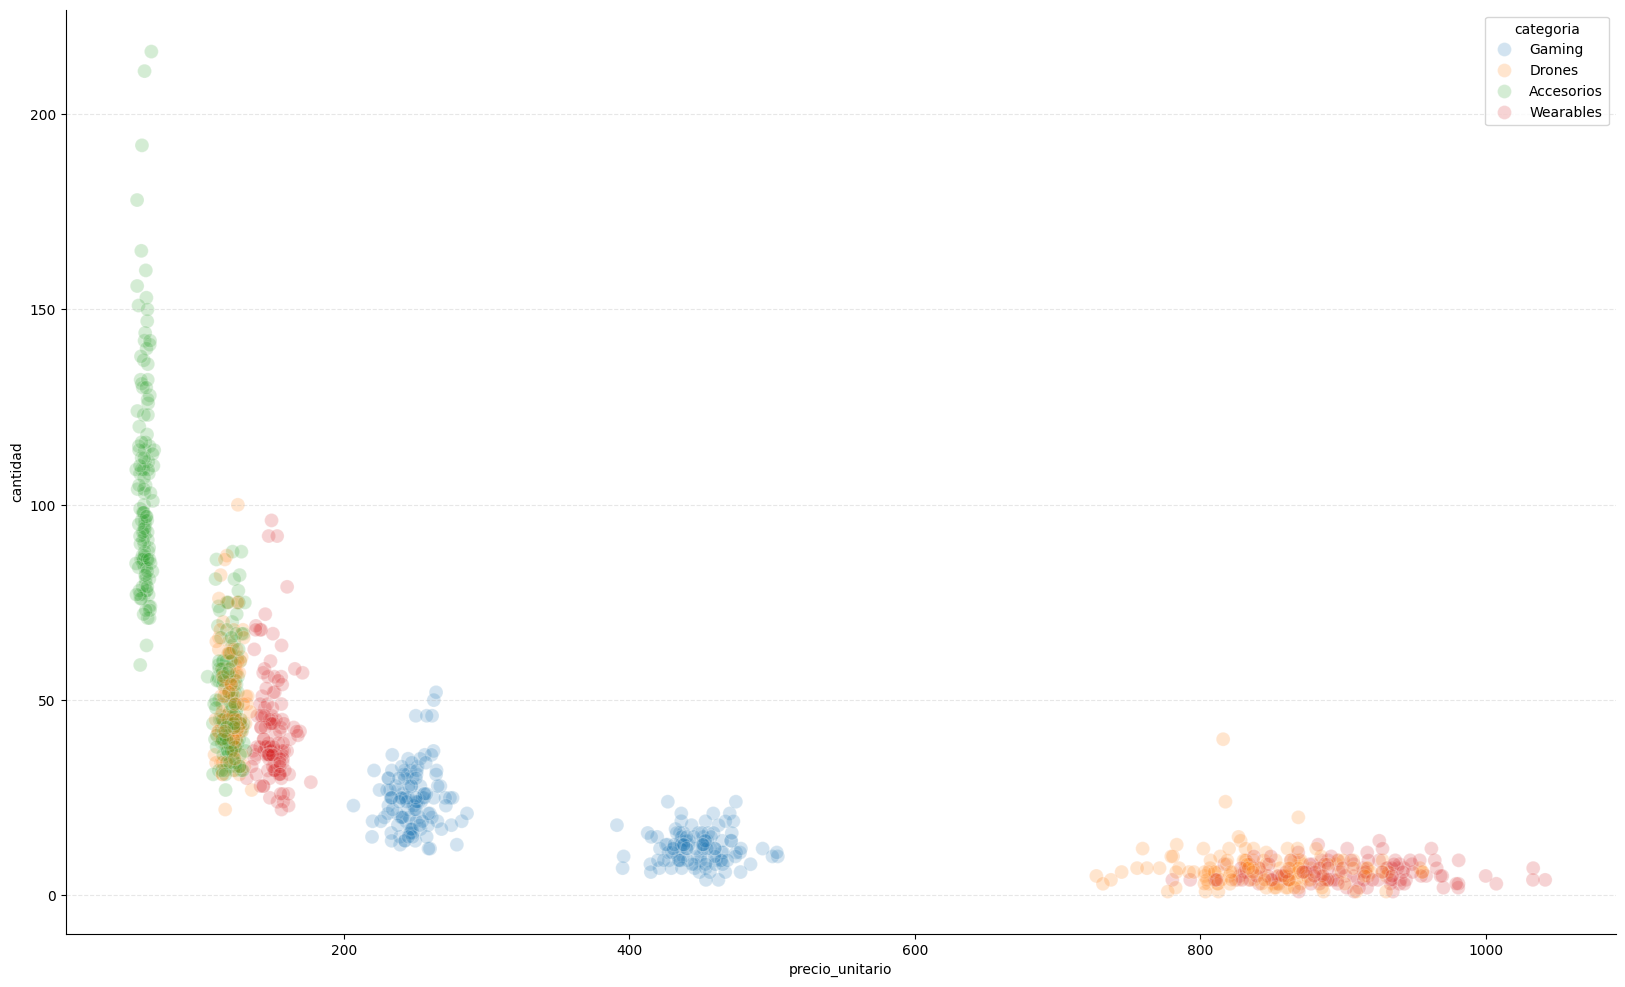

In [35]:
fig, ax= plt.subplots(figsize=(20,12))

sns.scatterplot(data=df, x="precio_unitario", y="cantidad", hue="categoria", alpha = 0.2, s=100, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis="y",linestyle="--"
, alpha=0.3)
plt.show()